In [16]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [17]:

dataset = pd.read_csv(r"co2_emission_agric.csv")
dataset = pd.DataFrame(dataset)
dataset.head()

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0                 NaN         9655167.0   
1                              0.0                 NaN        10230490.0   
2                              0.0                 NaN        10995568.0   
3                              0.0                 NaN        11858090.0   
4                              0.0                 NaN        12690115.0   

   Urban population  Total Population - Male  Total Population - Female  \
0         2593947.0                5348387.0                  5346409.0   
1         2763167.0                5372959.0                  5372208.0   
2         2985663.0                6028494.0                  6028939.0   
3         3237009.0                7003641.0                  7000119.0   
4         3482604.0                7733458.0                  7722096.0   

   total_emission  Average Temperature °C  
0     2198.963539                0.536167  
1     2323.876629                0.020667  
2     2356.304229               -0.259583  
3     2368.470529                0.101917  
4     2500.768729                0.372250  

[5 rows x 31 columns]

In [18]:
# Shape of dataset
dataset.shape

(6965, 31)

The dataset consist of 31 columns, which means 30 predictors plus target variable

In [19]:
# Copy of original dataset
df = dataset.copy()

# EDA


In [20]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('[^0-9a-zA-Z_]', '', regex=True)
df.head()

Area  Year  Savanna_fires  Forest_fires  Crop_Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice_Cultivation  Drained_organic_soils_CO2  Pesticides_Manufacturing  \
0            686.00                        0.0                 11.807483   
1            678.16                        0.0                 11.712073   
2            686.00                        0.0                 11.712073   
3            686.00                        0.0                 11.712073   
4            705.60                        0.0                 11.712073   

   Food_Transport  Forestland  ...  Manure_Management  Fires_in_organic_soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   Fires_in_humid_tropical_forests  Onfarm_energy_use  Rural_population  \
0                              0.0                NaN         9655167.0   
1                              0.0                NaN        10230490.0   
2                              0.0                NaN        10995568.0   
3                              0.0                NaN        11858090.0   
4                              0.0                NaN        12690115.0   

   Urban_population  Total_Population__Male  Total_Population__Female  \
0         2593947.0               5348387.0                 5346409.0   
1         2763167.0               5372959.0                 5372208.0   
2         2985663.0               6028494.0                 6028939.0   
3         3237009.0               7003641.0                 7000119.0   
4         3482604.0               7733458.0                 7722096.0   

   total_emission  Average_Temperature_C  
0     2198.963539               0.536167  
1     2323.876629               0.020667  
2     2356.304229              -0.259583  
3     2368.470529               0.101917  
4     2500.768729               0.372250  

[5 rows x 31 columns]

Copy is convinient to make changes to without losing orinal data


In [21]:
df.describe().T

count          mean           std  \
Year                             6965.0  2.005125e+03  8.894665e+00   
Savanna_fires                    6934.0  1.188391e+03  5.246288e+03   
Forest_fires                     6872.0  9.193022e+02  3.720079e+03   
Crop_Residues                    5576.0  9.987063e+02  3.700345e+03   
Rice_Cultivation                 6965.0  4.259667e+03  1.761383e+04   
Drained_organic_soils_CO2        6965.0  3.503229e+03  1.586145e+04   
Pesticides_Manufacturing         6965.0  3.334184e+02  1.429159e+03   
Food_Transport                   6965.0  1.939582e+03  5.616749e+03   
Forestland                       6472.0 -1.782829e+04  8.183221e+04   
Net_Forest_conversion            6472.0  1.760564e+04  1.011575e+05   
Food_Household_Consumption       6492.0  4.847580e+03  2.578914e+04   
Food_Retail                      6965.0  2.043211e+03  8.494249e+03   
Onfarm_Electricity_Use           6965.0  1.626681e+03  9.343182e+03   
Food_Packaging                   6965.0  1.658630e+03  1.148134e+04   
Agrifood_Systems_Waste_Disposal  6965.0  6.018445e+03  2.215674e+04   
Food_Processing                  6965.0  3.872724e+03  1.983822e+04   
Fertilizers_Manufacturing        6965.0  3.035723e+03  1.169303e+04   
IPPU                             6222.0  1.999150e+04  1.114209e+05   
Manure_applied_to_Soils          6037.0  9.232256e+02  3.226992e+03   
Manure_left_on_Pasture           6965.0  3.518027e+03  9.103556e+03   
Manure_Management                6037.0  2.263345e+03  7.980542e+03   
Fires_in_organic_soils           6965.0  1.210316e+03  2.266985e+04   
Fires_in_humid_tropical_forests  6810.0  6.684529e+02  3.264879e+03   
Onfarm_energy_use                6009.0  3.008982e+03  1.263786e+04   
Rural_population                 6965.0  1.785774e+07  8.901521e+07   
Urban_population                 6965.0  1.693230e+07  6.574362e+07   
Total_Population__Male           6965.0  1.761963e+07  7.603993e+07   
Total_Population__Female         6965.0  1.732447e+07  7.251711e+07   
total_emission                   6965.0  6.409124e+04  2.283130e+05   
Average_Temperature_C            6965.0  8.729891e-01  5.559295e-01   

                                           min            25%           50%  \
Year                               1990.000000    1997.000000  2.005000e+03   
Savanna_fires                         0.000000       0.000000  1.651850e+00   
Forest_fires                          0.000000       0.000000  5.179000e-01   
Crop_Residues                         0.000200      11.006525  1.036982e+02   
Rice_Cultivation                      0.000000     181.260800  5.348174e+02   
Drained_organic_soils_CO2             0.000000       0.000000  0.000000e+00   
Pesticides_Manufacturing              0.000000       6.000000  1.300000e+01   
Food_Transport                        0.000100      27.958600  2.049628e+02   
Forestland                      -797183.079000   -2848.350000 -6.292000e+01   
Net_Forest_conversion                 0.000000       0.000000  4.444000e+01   
Food_Household_Consumption            0.000000      11.399950  1.554711e+02   
Food_Retail                           0.000000      26.818500  1.720426e+02   
Onfarm_Electricity_Use                0.000000       8.037600  2.912070e+01   
Food_Packaging                        0.000000      67.631366  7.401813e+01   
Agrifood_Systems_Waste_Disposal       0.340000      86.680500  9.012757e+02   
Food_Processing                       0.000100     209.587728  3.447602e+02   
Fertilizers_Manufacturing             0.001900     360.358799  1.115052e+03   
IPPU                                  0.000000      39.031525  8.037066e+02   
Manure_applied_to_Soils               0.049000      16.303000  1.204439e+02   
Manure_left_on_Pasture                0.000700     139.669900  9.725674e+02   
Manure_Management                     0.432900      37.632100  2.698563e+02   
Fires_in_organic_soils                0.000000       0.000000  0.000000e+00   
Fires_in_humid_

In [22]:
df.isnull().sum()

Area                                  0
Year                                  0
Savanna_fires                        31
Forest_fires                         93
Crop_Residues                      1389
Rice_Cultivation                      0
Drained_organic_soils_CO2             0
Pesticides_Manufacturing              0
Food_Transport                        0
Forestland                          493
Net_Forest_conversion               493
Food_Household_Consumption          473
Food_Retail                           0
Onfarm_Electricity_Use                0
Food_Packaging                        0
Agrifood_Systems_Waste_Disposal       0
Food_Processing                       0
Fertilizers_Manufacturing             0
IPPU                                743
Manure_applied_to_Soils             928
Manure_left_on_Pasture                0
Manure_Management                   928
Fires_in_organic_soils                0
Fires_in_humid_tropical_forests     155
Onfarm_energy_use                   956


In [23]:
columns_with_null = df.columns[df.isnull().any()]
columns_with_null

Index(['Savanna_fires', 'Forest_fires', 'Crop_Residues', 'Forestland',
       'Net_Forest_conversion', 'Food_Household_Consumption', 'IPPU',
       'Manure_applied_to_Soils', 'Manure_Management',
       'Fires_in_humid_tropical_forests', 'Onfarm_energy_use'],
      dtype='object')

# Univariate Analysis

  ### Checking for distribution 
  let's plot a histogram of each of the columns with null values to understand the distribution of the data, 
  this will help conclude which measure of tendency to use to fill the null values.

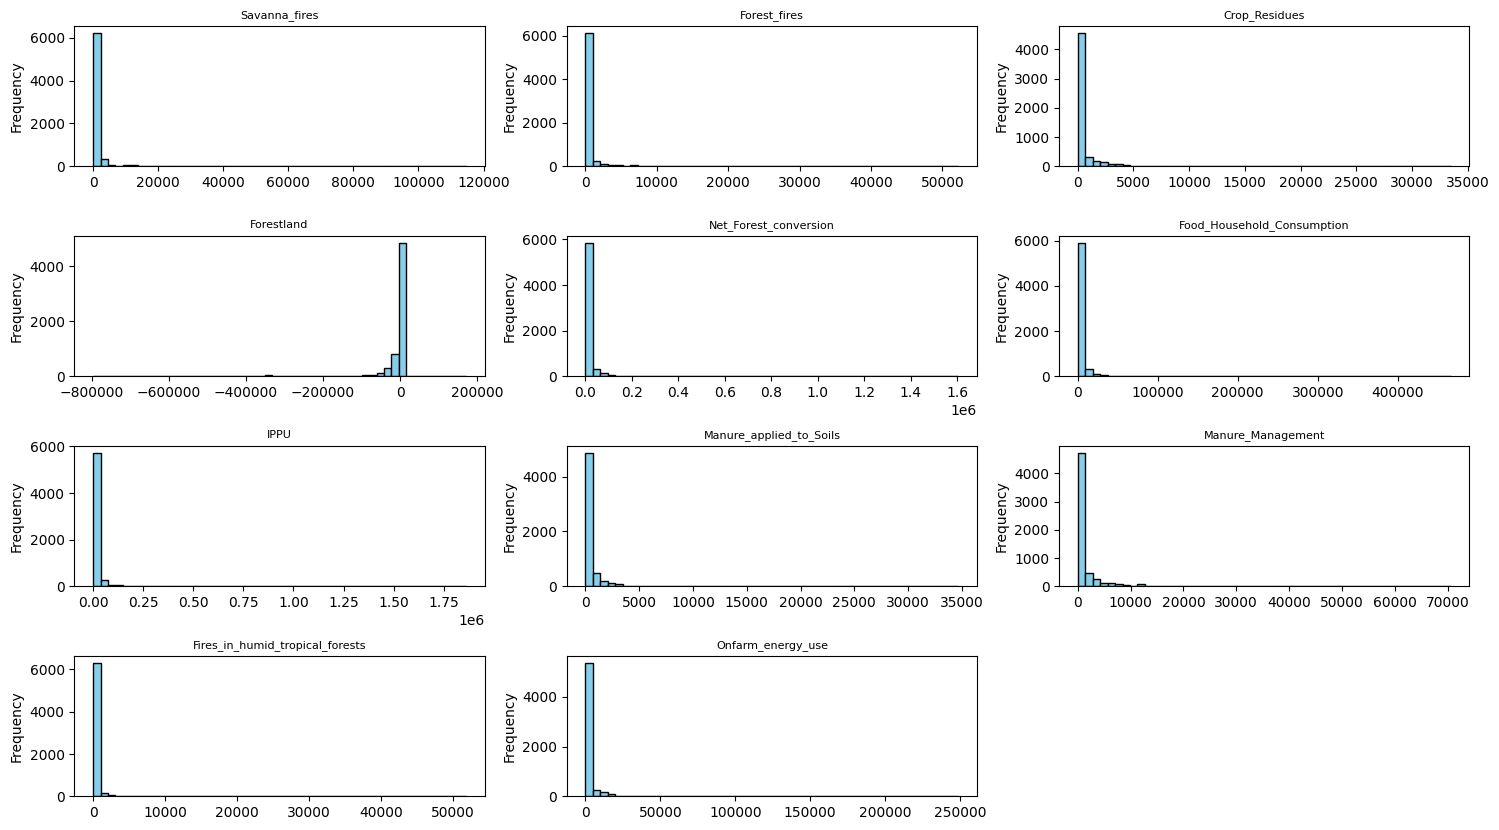

In [24]:
null_data = df.isnull()
fig = plt.figure(figsize=(18, 10))
fig.subplots_adjust(hspace = 0.5, wspace=.2)

# Plot histograms for all columns
for i, column in enumerate(columns_with_null, 1):
    plt.subplot(4, 3, i)  # Adjust subplot grid (2 rows, 2 columns for this example)
    plt.hist(df[column], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'{column}', fontsize= 8)
    plt.ylabel('Frequency')
    

In [25]:
# Fill null values for each column with column mean
for column in columns_with_null:
    df[column].fillna(df[column].mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_9656\43187463.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [26]:
# To check if null values were filled successfully
df.isnull().sum()

Area                               0
Year                               0
Savanna_fires                      0
Forest_fires                       0
Crop_Residues                      0
Rice_Cultivation                   0
Drained_organic_soils_CO2          0
Pesticides_Manufacturing           0
Food_Transport                     0
Forestland                         0
Net_Forest_conversion              0
Food_Household_Consumption         0
Food_Retail                        0
Onfarm_Electricity_Use             0
Food_Packaging                     0
Agrifood_Systems_Waste_Disposal    0
Food_Processing                    0
Fertilizers_Manufacturing          0
IPPU                               0
Manure_applied_to_Soils            0
Manure_left_on_Pasture             0
Manure_Management                  0
Fires_in_organic_soils             0
Fires_in_humid_tropical_forests    0
Onfarm_energy_use                  0
Rural_population                   0
Urban_population                   0
T

# Bivariate analysis

## Checking for linearity

To ensure accurate predictions, we need to assess the linearity between predictor and response variables. This can be done by visualizing scatter plots to identify linear trends. If non-linearity is present, a linear regression model may not be suitable.


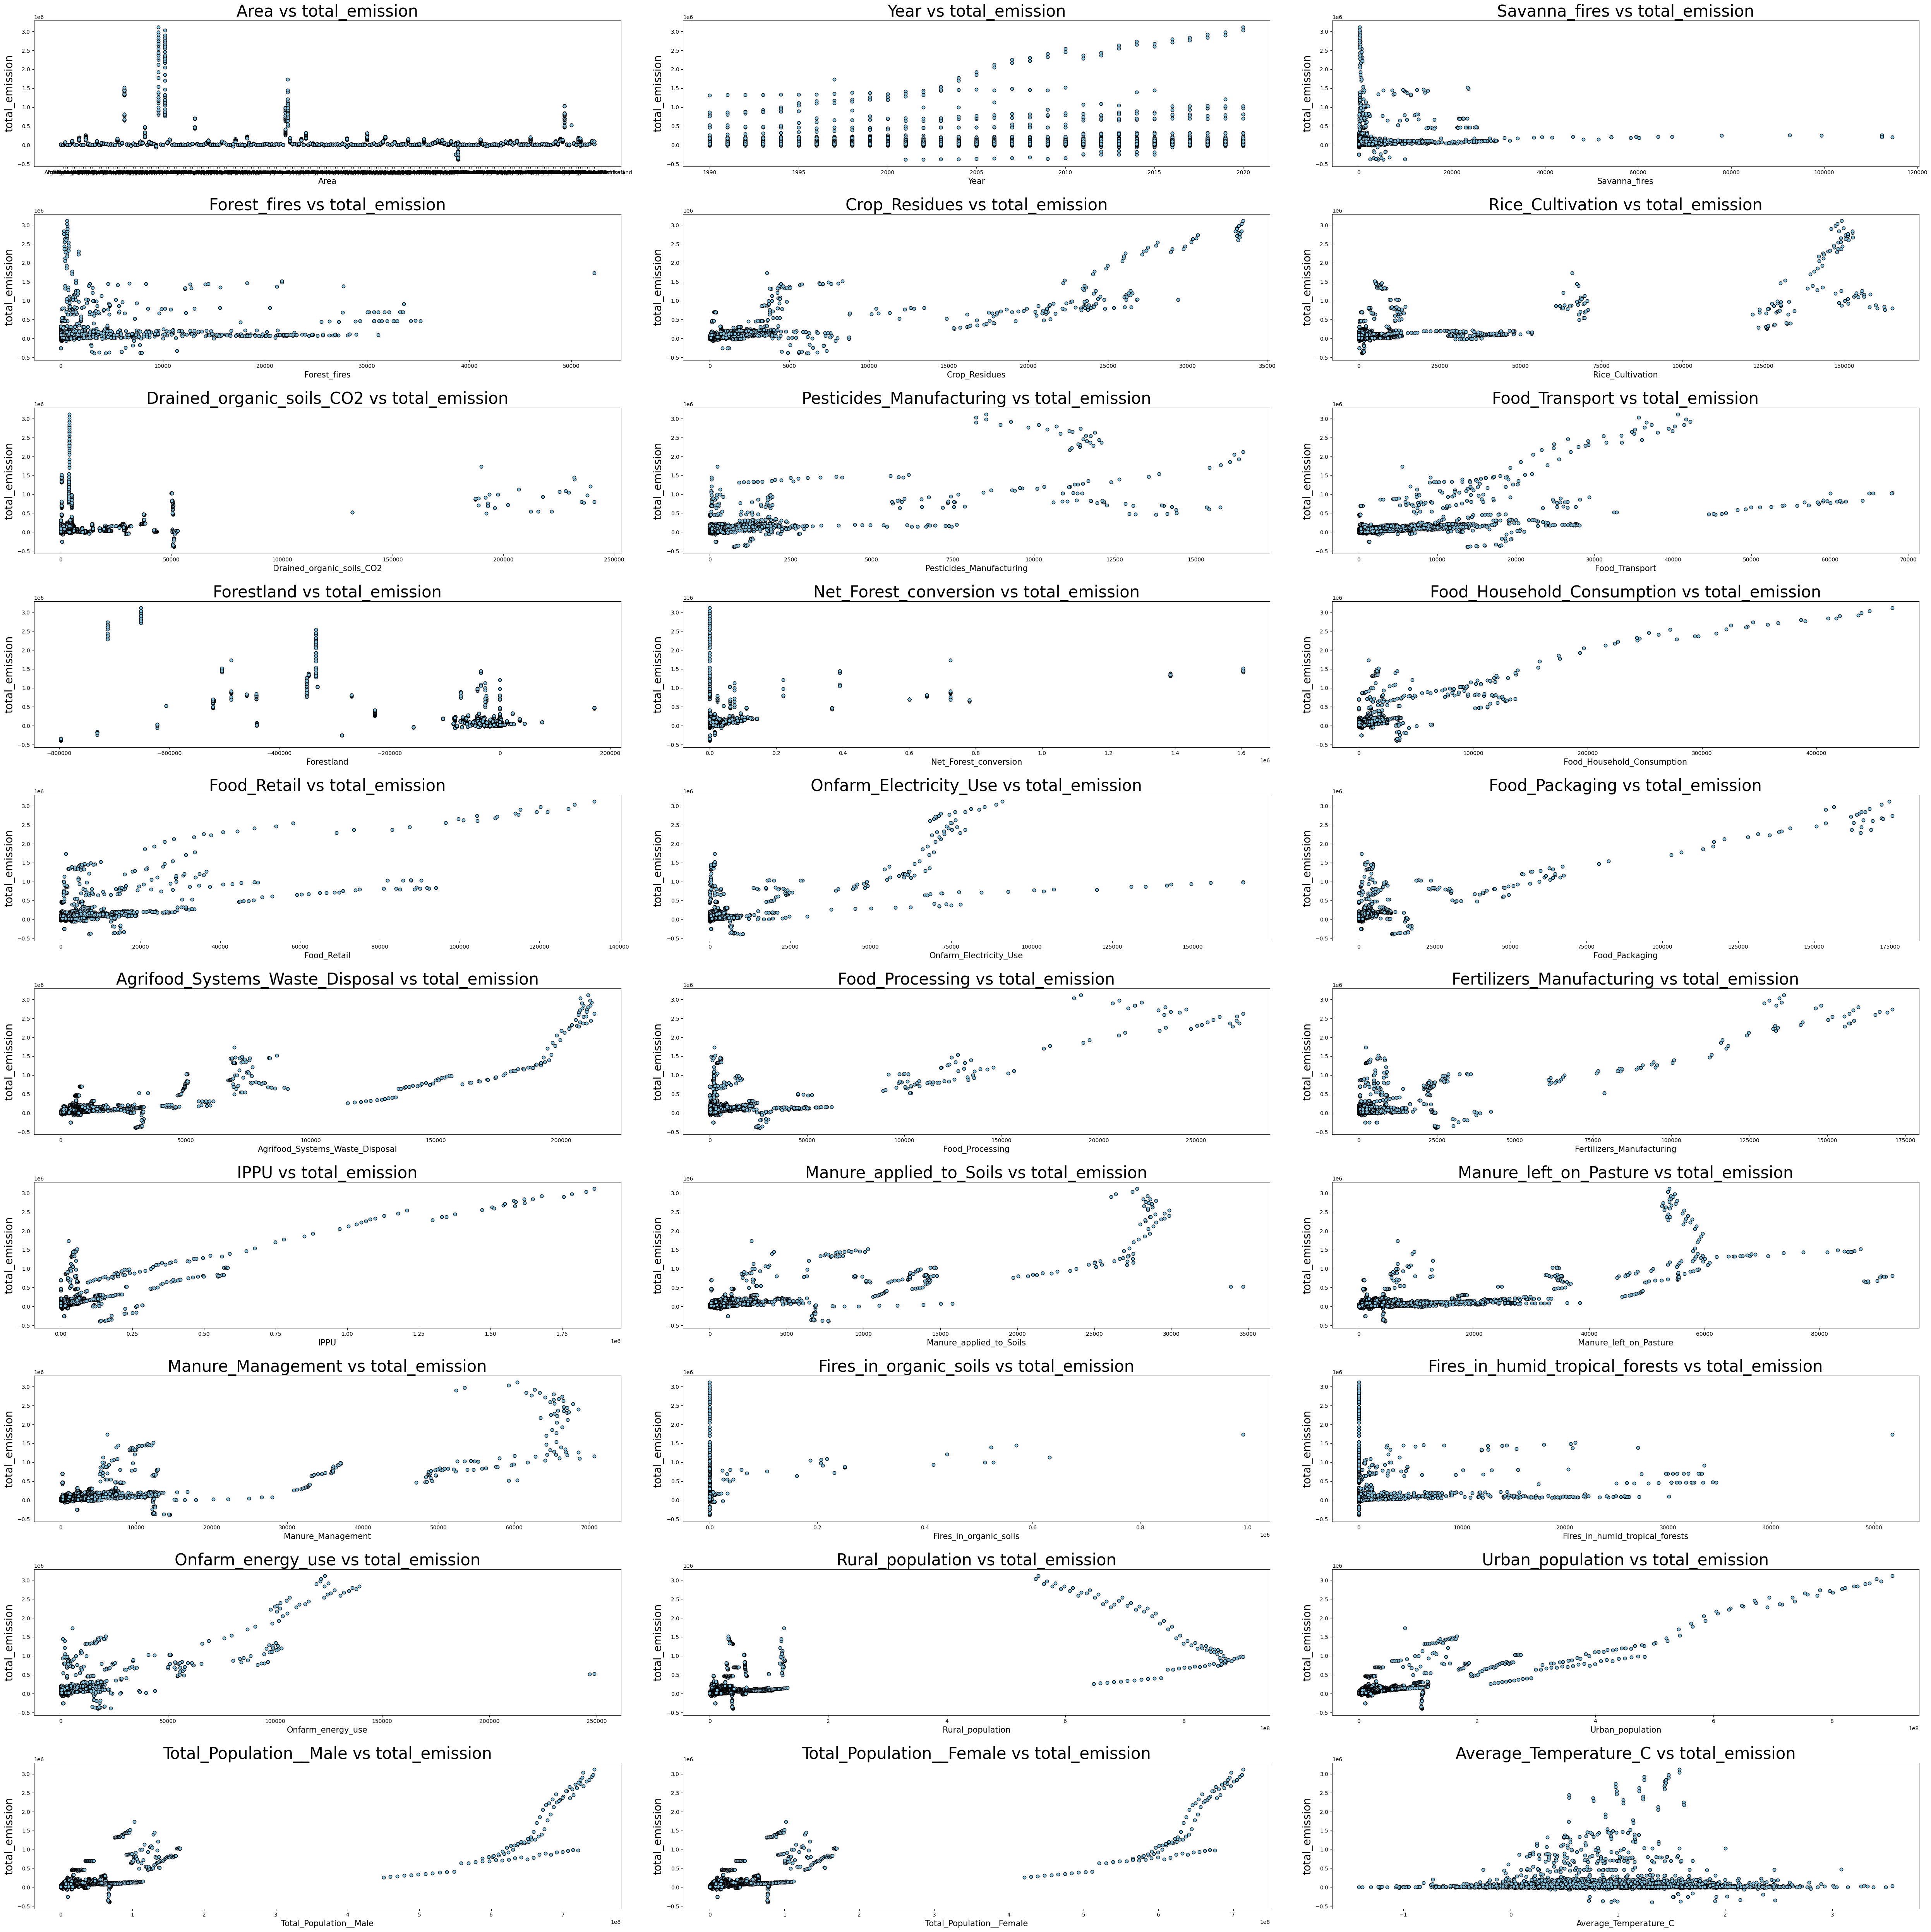

In [27]:
import math

target = 'total_emission'
features = ['Area', 'Year', 'Savanna_fires', 'Forest_fires', 'Crop_Residues',
       'Rice_Cultivation', 'Drained_organic_soils_CO2',
       'Pesticides_Manufacturing', 'Food_Transport', 'Forestland',
       'Net_Forest_conversion', 'Food_Household_Consumption', 'Food_Retail',
       'Onfarm_Electricity_Use', 'Food_Packaging',
       'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
       'Fertilizers_Manufacturing', 'IPPU', 'Manure_applied_to_Soils',
       'Manure_left_on_Pasture', 'Manure_Management', 'Fires_in_organic_soils',
       'Fires_in_humid_tropical_forests', 'Onfarm_energy_use',
       'Rural_population', 'Urban_population', 'Total_Population__Male',
       'Total_Population__Female', 'Average_Temperature_C']
 
n_features = len(features)
n_cols = 3  # Number of columns in the grid
n_rows = math.ceil(n_features / n_cols) 

plt.figure(figsize=(50, 5* n_rows))
for i, feature in enumerate(features, start=1):
    plt.subplot(n_rows, n_cols, i)  # Create subplots
    plt.scatter(df[feature], df['total_emission'], color='skyblue', edgecolor='black')
    plt.title(f'{feature} vs {target}', fontsize=30)
    plt.xlabel(feature, fontsize= 15)
    plt.ylabel(target, fontsize= 20)

plt.tight_layout()
plt.show()

# Multivariate analysis

## Checking for multicolinearity

   Multicollinearity occurs when two or more predictor variables in a dataset are strongly correlated. This issue reduces model quality by increasing the standard error of coefficient estimates, making them less precise and leading to wider confidence intervals. Additionally, it complicates estimating the effect of individual predictors on the response variable, as coefficients become sensitive to small changes in the model or data, resulting in instability. 
   
   To test for multicollinearity, we will create paired scatter plots of the predictors and generate a correlation heatmap. These visualizations help identify and assess the strength of correlations among predictors

### Pairwise scatter plot

A pairwise scatter plot matrix creates an n×n grid, where 𝑛 is the number of predictor variables being compared. Each cell in the matrix represents the relationship between two pridictors. Diagonal cells show comparisons of a variable with itself, but instead of scatter plots, they typically display histograms or density plots. These diagonal elements highlight the univariate distribution of each variable, providing insights into the range and distribution of their values.

In [28]:
from seaborn import pairplot

g = pairplot(df.drop(columns=['total_emission', 'Area'], axis='columns'))
g.fig.set_size_inches(50,50)

for label in g.axes.flat:
    label.set_xlabel(label.get_xlabel(), rotation=45, ha='right', fontsize=10)
    label.set_ylabel(label.get_ylabel(), rotation=0, ha='right', fontsize=10)

# Adjust the layout to avoid overlap
g.fig.tight_layout()
g.fig.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9656\2589846800.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  g.fig.show()


Error in callback <function flush_figures at 0x000002686BC51A80> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

## Correlation heatmap

<Figure size 1500x600 with 0 Axes>

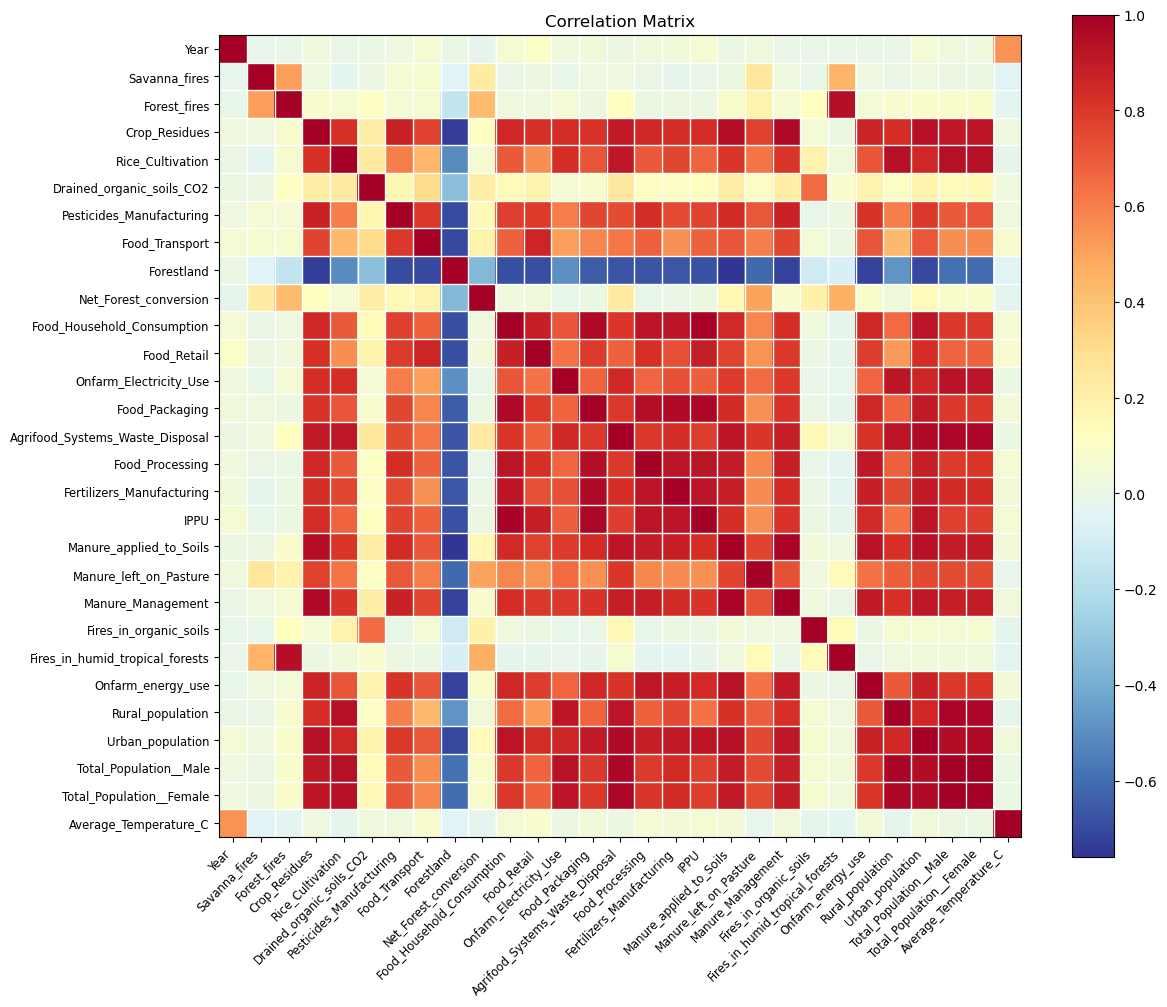

In [ ]:
from statsmodels.graphics.correlation import plot_corr
corr = df.drop(columns=['total_emission', 'Area'], axis='columns').corr()

fig = plt.figure(figsize=(15, 6))
fig= plot_corr(corr,xnames=corr.columns)
fig.set_size_inches(15,15)

In [ ]:
def print_feature_importances(X, y, rf_model):
    """
    Function to print feature importances of a RandomForestRegressor model
    and output R-squared and Mean Squared Error (MSE) scores.

    Parameters:
    X : DataFrame
        The feature set (independent variables).
    y : Series
        The target variable (dependent variable).
    rf_model : RandomForestRegressor
        The trained RandomForest model.
    """
    # Get the feature importances
    feature_importances = rf_model.feature_importances_

    # Print the feature importances
    for feature, importance in zip(X.columns, feature_importances):
        print(f"Feature: {feature}, Importance: {importance}")

    # Make predictions on the test set
    y_pred = rf_model.predict(X)

    # Calculate R-squared and MSE
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return r2, mse
print_feature_importances(X, y, rf_model)

## Multiple Linear Regression

In [ ]:
# multiple linear regression 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import math

X = df.drop(columns=['Area', 'total_emission'], axis=1)
y = df['total_emission']

x_scaler = StandardScaler()

lm = LinearRegression()



X_scaled = x_scaler.fit_transform(X)
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

X_standardise.describe().loc['std']    # values range [0:1]

#3. Ridge
X_train, X_test, y_train, y_test = train_test_split(X_standardised, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=True)
from sklearn.linear_model import Ridge
lm.fit(X_train, y_train)
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

test_lm = lm.predict(X_test)
test_ridge = ridge.predict(X_test)


r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'r2: {r2}')
print(f'rmse: {rmse}')

r2: 0.99939100230168
rmse: 6385.6987895730035


### Generate regression string

In the R programming language, fitting a machine learning model typically involves defining the relationship between variables using a formula-based interface. In this interface, a string of the form:

`y ~ X`

The string is read as "Regress *y* on $X$", indicating that we want to model the relationship between the response variable *y* and the predictor variable(s) $X$.

In Python's statsmodels library, the formula interface is used to define regression models. To fit a model using this approach, we need to construct a formula string. For example, a formula like y ~ $X_1$ + $X_2$ specifies a regression model where y is the dependent variable, and $X_1$ and $X_2$ are the predictors.

In [ ]:
import statsmodels.formula.api as sm

target = 'total_emission'
independent_columns = ['Year', 'Savanna_fires', 'Forest_fires', 'Crop_Residues',
       'Rice_Cultivation', 'Drained_organic_soils_CO2',
       'Pesticides_Manufacturing', 'Food_Transport', 'Forestland',
       'Net_Forest_conversion', 'Food_Household_Consumption', 'Food_Retail',
       'Onfarm_Electricity_Use', 'Food_Packaging',
       'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
       'Fertilizers_Manufacturing', 'IPPU', 'Manure_applied_to_Soils',
       'Manure_left_on_Pasture', 'Manure_Management', 'Fires_in_organic_soils',
       'Fires_in_humid_tropical_forests', 'Onfarm_energy_use',
       'Rural_population', 'Urban_population', 'Total_Population__Male',
       'Total_Population__Female', 'total_emission', 'Average_Temperature_C']

formula_str = target+' ~ '+'+'.join(independent_columns)
formula_str


'total_emission ~ Year+Savanna_fires+Forest_fires+Crop_Residues+Rice_Cultivation+Drained_organic_soils_CO2+Pesticides_Manufacturing+Food_Transport+Forestland+Net_Forest_conversion+Food_Household_Consumption+Food_Retail+Onfarm_Electricity_Use+Food_Packaging+Agrifood_Systems_Waste_Disposal+Food_Processing+Fertilizers_Manufacturing+IPPU+Manure_applied_to_Soils+Manure_left_on_Pasture+Manure_Management+Fires_in_organic_soils+Fires_in_humid_tropical_forests+Onfarm_energy_use+Rural_population+Urban_population+Total_Population__Male+Total_Population__Female+total_emission+Average_Temperature_C'

In [ ]:
# construct and fit model using OLS
model=sm.ols(formula=formula_str, data=df)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:         total_emission   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.282e+29
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:30:21   Log-Likelihood:             1.2064e+05
No. Observations:                6965   AIC:                        -2.412e+05
Df Residuals:                    6934   BIC:                        -2.410e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
# Get p-values for all features
p_values = fitted.pvalues  

# Filter for p-values < 0.05
significant_p_values = p_values[p_values < 0.05]
significant_p_values

In [ ]:
significant_features = ['Savanna_fires', 'Rice_Cultivation', 'Drained_organic_soils_CO2', 'Food_Transport', 
                        'Forestland', 'Net_Forest_conversion', 'Food_Retail', 'Onfarm_Electricity_Use', 'Food_Packaging',
                        'Agrifood_Systems_Waste_Disposal', 'Food_Processing', 'Fertilizers_Manufacturing', 'IPPU', 
                        'Manure_left_on_Pasture', 'Fires_in_organic_soils', 'Fires_in_humid_tropical_forests', 
                        'Onfarm_energy_use', 'Rural_population', 'Urban_population', 'Total_Population__Male',
                        'Total_Population__Female']
formula_str = target+' ~ '+'+'.join(significant_features)
formula_str


'total_emission ~ Savanna_fires+Rice_Cultivation+Drained_organic_soils_CO2+Food_Transport+Forestland+Net_Forest_conversion+Food_Retail+Onfarm_Electricity_Use+Food_Packaging+Agrifood_Systems_Waste_Disposal+Food_Processing+Fertilizers_Manufacturing+IPPU+Manure_left_on_Pasture+Fires_in_organic_soils+Fires_in_humid_tropical_forests+Onfarm_energy_use+Rural_population+Urban_population+Total_Population__Male+Total_Population__Female'

In [ ]:
model=sm.ols(formula=formula_str, data=df)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:         total_emission   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.752e+05
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:30:46   Log-Likelihood:                -72398.
No. Observations:                6965   AIC:                         1.448e+05
Df Residuals:                    6943   BIC:                         1.450e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

## Homoscedasticity
  Check if residual variance remains constant along fitted values

### Residuals vs Fitted

To evaluate the presence of homoscedasticity or heteroscedasticity, we can plot the residuals against the fitted values (e.g., total emission). If the scatterplot displays a random and uniform spread of points, this indicates homoscedasticity, where the variance of residuals remains consistent across all levels of the predictor variable(s). In contrast, heteroscedasticity manifests as a systematic change in the spread of residuals with increasing or decreasing fitted values, often forming a cone-like pattern

In [31]:

plt.figure(figsize=(8,3))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin = min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

NameError: name 'fitted' is not defined

<Figure size 800x300 with 0 Axes>

In [30]:


x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Normalise X and y
X_scaled = x_scaler.fit_transform(np.array(X)[:,np.newaxis]) 
y_scaled = y_scaler.fit_transform(np.array(y)[:,np.newaxis]) 

# Set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=6)


NameError: name 'X' is not defined

Decision Tree Model (DTM)

1.1 Building the decision tree.

In [14]:
# Required libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [15]:
df = pd.read_csv("co2_emission_agric.csv")
df.head()

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0                 NaN         9655167.0   
1                              0.0                 NaN        10230490.0   
2                              0.0                 NaN        10995568.0   
3                              0.0                 NaN        11858090.0   
4                              0.0                 NaN        12690115.0   

   Urban population  Total Population - Male  Total Population - Female  \
0         2593947.0                5348387.0                  5346409.0   
1         2763167.0                5372959.0                  5372208.0   
2         2985663.0                6028494.0                  6028939.0   
3         3237009.0                7003641.0                  7000119.0   
4         3482604.0                7733458.0                  7722096.0   

   total_emission  Average Temperature °C  
0     2198.963539                0.536167  
1     2323.876629                0.020667  
2     2356.304229               -0.259583  
3     2368.470529                0.101917  
4     2500.768729                0.372250  

[5 rows x 31 columns]

In [16]:
X = df.drop(columns = ['total_emission']) # Features
y = df['total_emission']  # Target

In [ ]:
# Train test split libraries.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Aligning the indices of X and y.
X, y = X.align(y, join='inner', axis=0)

# Test size to 20 % of training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Conversion of non-numeric columns to numeric.
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align train and test data
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


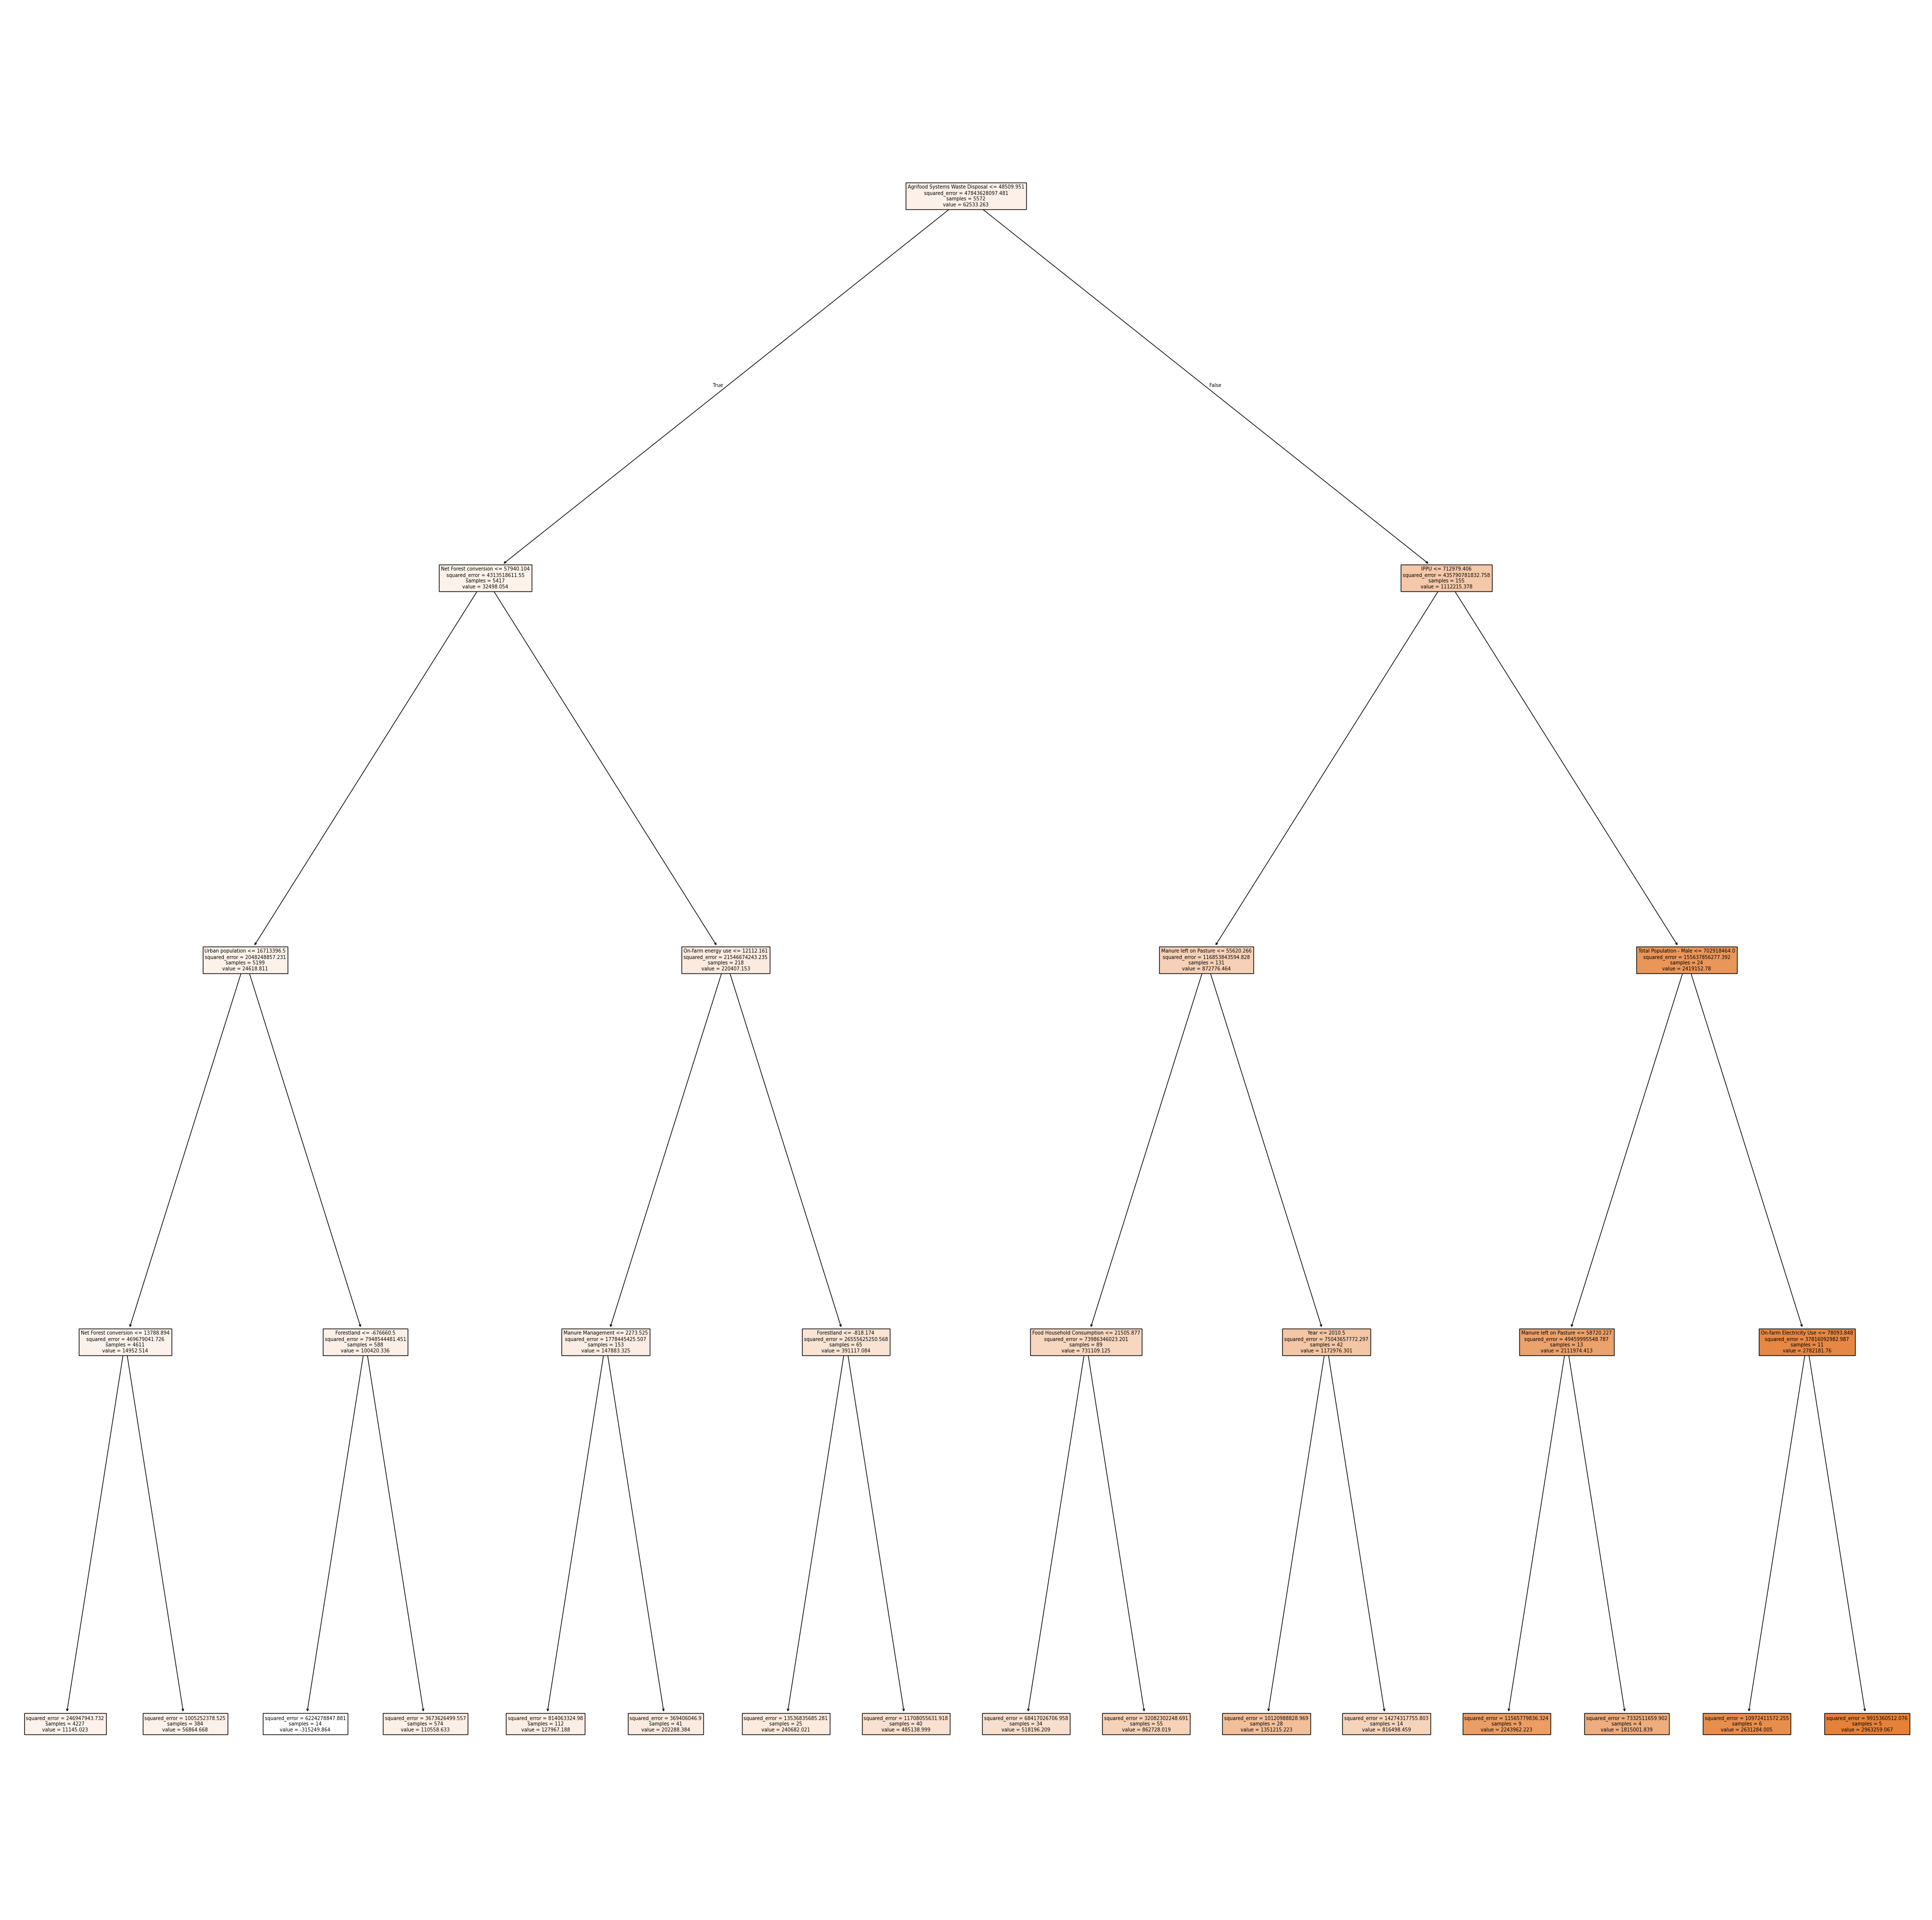

In [34]:
# Instantiate regression tree model
model = DecisionTreeRegressor(max_depth=4,random_state=42)
model.fit(X_train,y_train)

plt.figure(figsize=(50, 50))
plot_tree(model, fontsize=50)
plot_tree(model, feature_names=X_train.columns, filled=True)
plt.show()


1.2 Evaluating the model performance.

In [21]:
# Importing the required libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
# Predictions for test data
y_pred = model.predict(X_test)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Mean Square Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Absolute Error: 20169.540964959902
Mean Squared Error: 2918727517.978238
Root Mean Squared Error: 54025.24889325581
R-squared: 0.957805731905336


1.3 Visualising model output

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


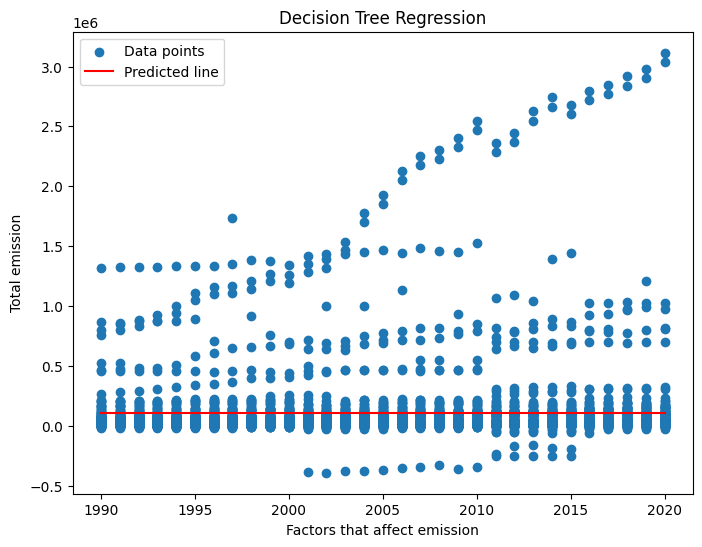

In [26]:
# Ensure X has only numeric data and matches the training dataset structure
X = X.select_dtypes(include=[np.number])

# Select one feature for visualization (e.g., the first column)
X_single_feature = X.iloc[:, 0]  # Use the first feature for plotting

# Generate a range of equidistant points for this feature
x_domain = np.linspace(X_single_feature.min(), X_single_feature.max(), 100)

# Create a full dataset for prediction with the same number of features as the training data
X_full_domain = np.tile(X.mean(axis=0).values, (100, 1))  # Fill with mean values
X_full_domain[:, 0] = x_domain  # Replace the first column with x_domain

# Ensure the number of features matches the training data
# Add a dummy column if necessary
if X_full_domain.shape[1] < model.n_features_in_:
    missing_features = model.n_features_in_ - X_full_domain.shape[1]
    dummy_columns = np.zeros((X_full_domain.shape[0], missing_features))
    X_full_domain = np.hstack((X_full_domain, dummy_columns))

# Predict y for every point in x-domain
y_predictions = model.predict(X_full_domain)

# Plot the regression tree line over the data
plt.figure(figsize=(8, 6))
plt.scatter(X_single_feature, y, label="Data points")
plt.plot(x_domain, y_predictions, color="red", label="Predicted line")
plt.xlabel("Factors that affect emission")
plt.ylabel("Total emission")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


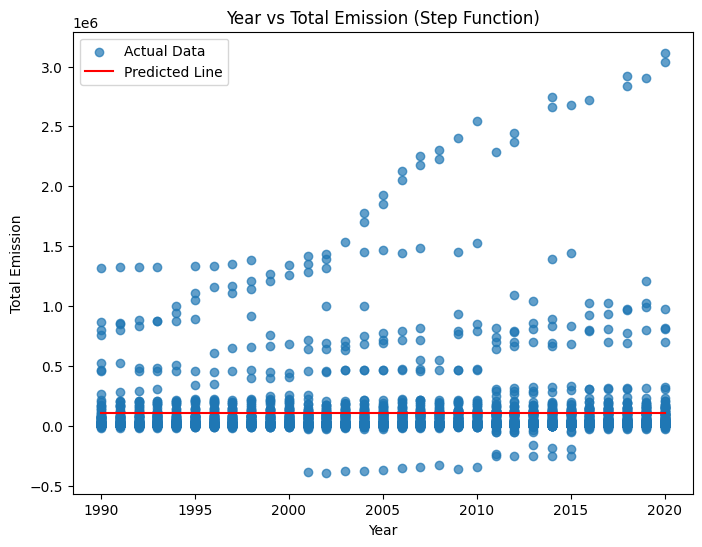

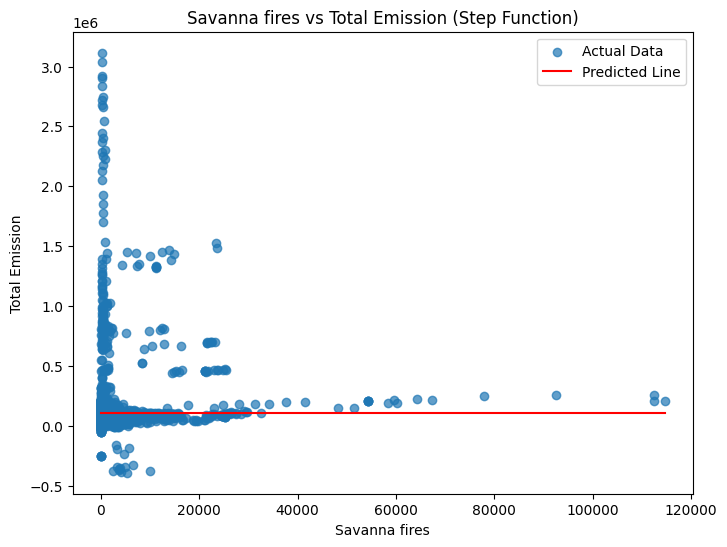

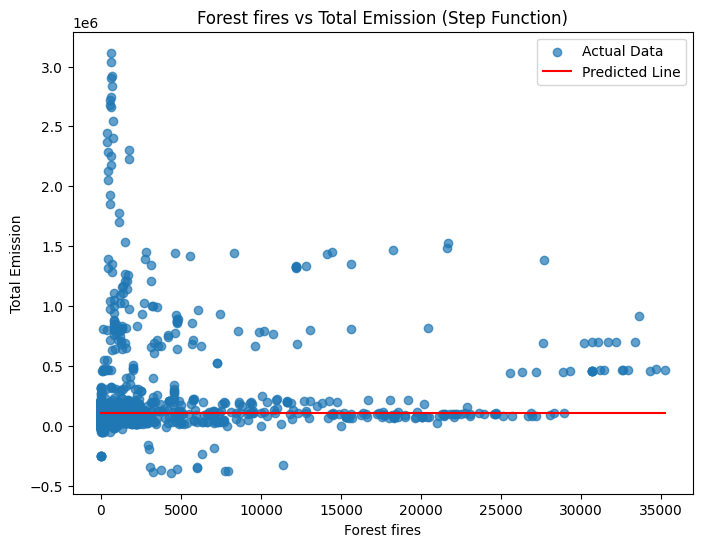

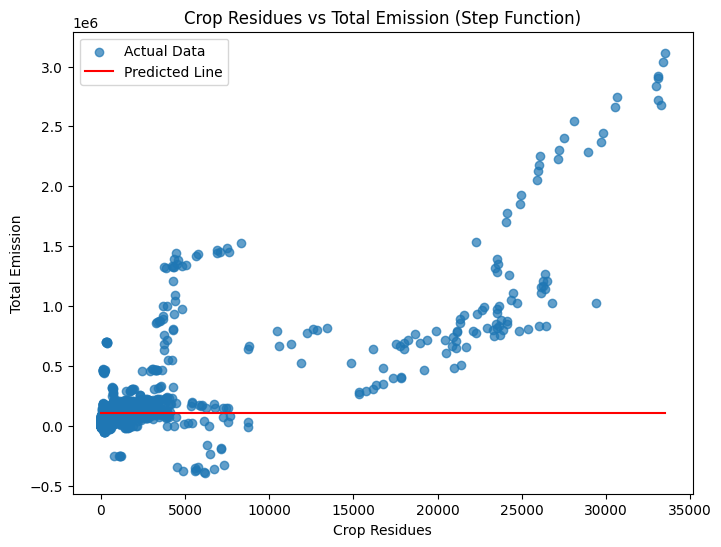

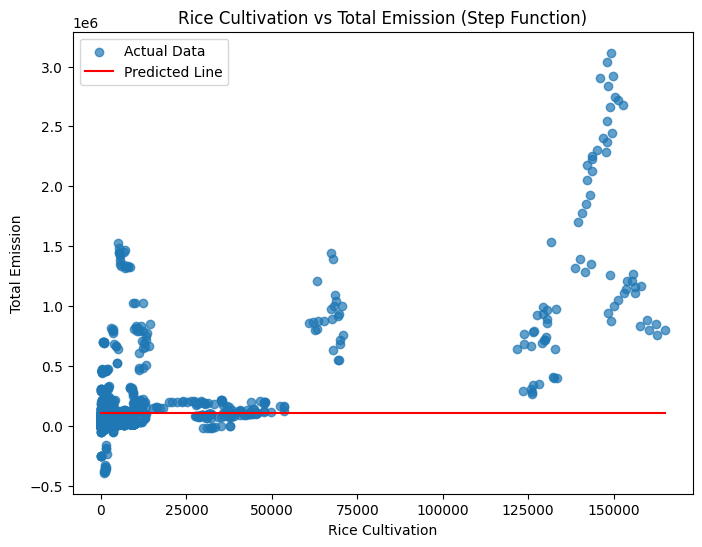

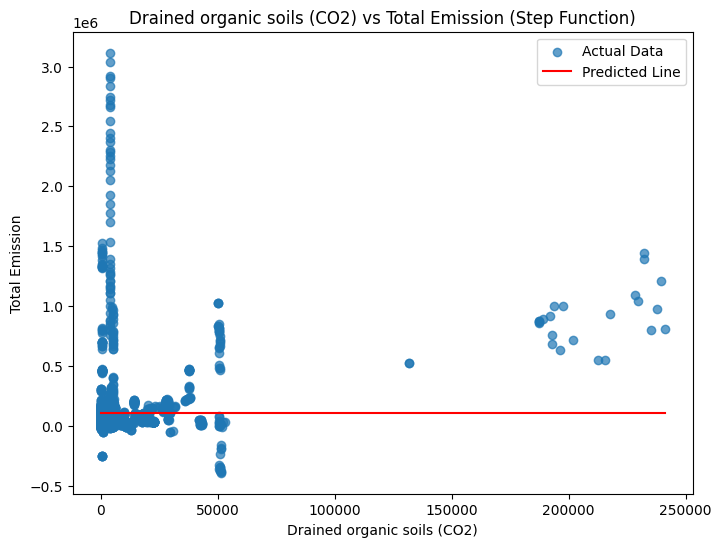

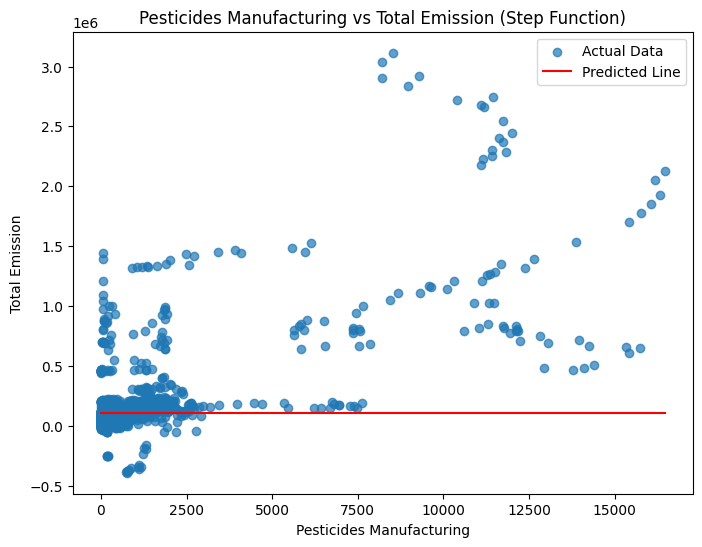

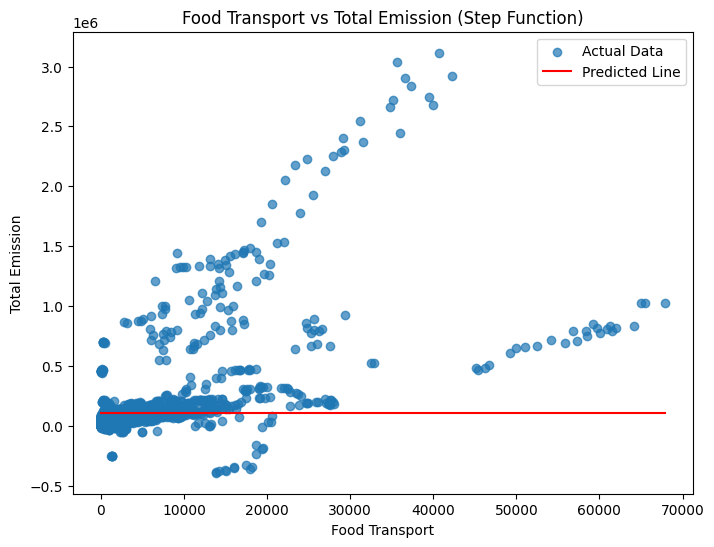

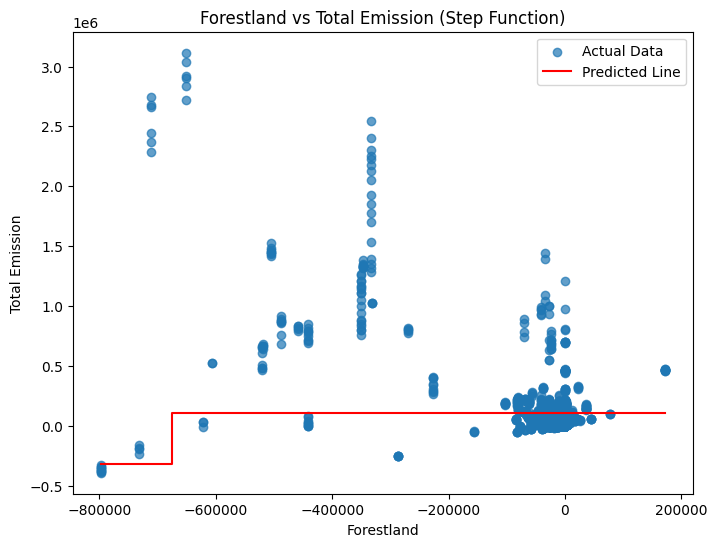

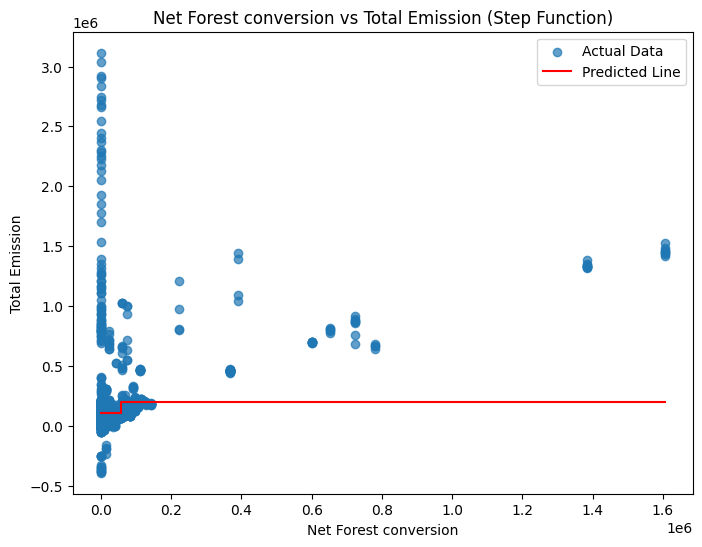

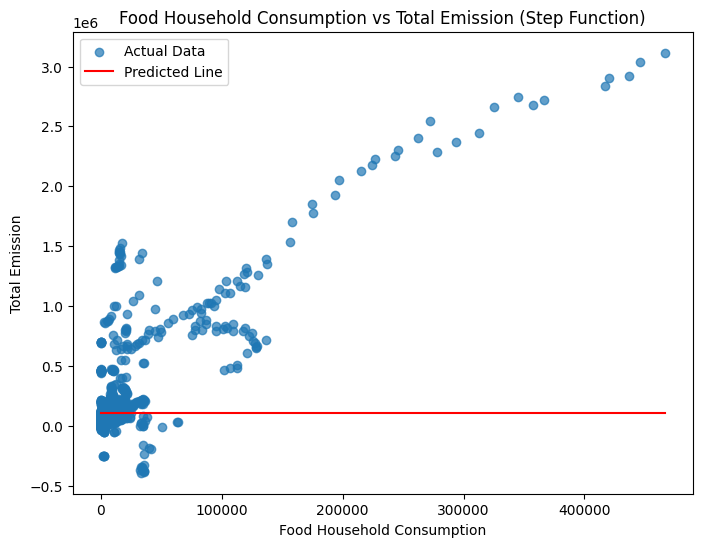

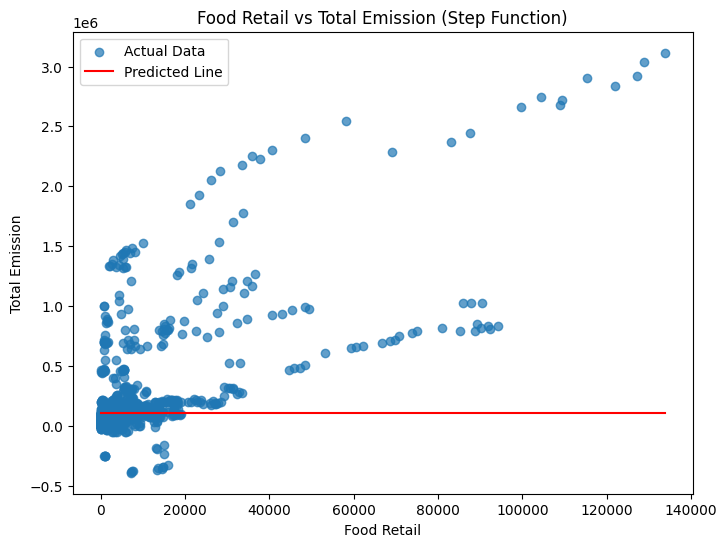

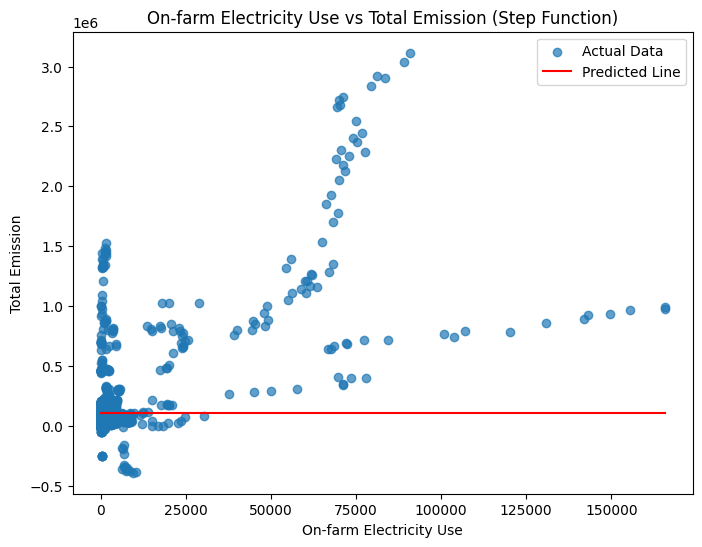

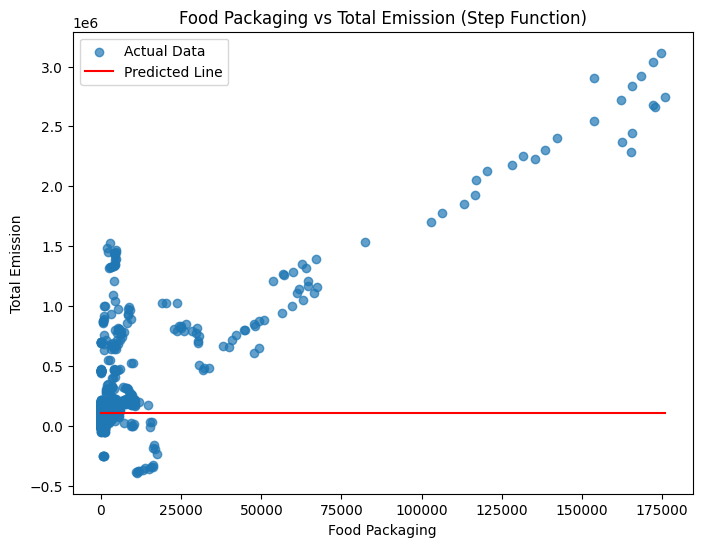

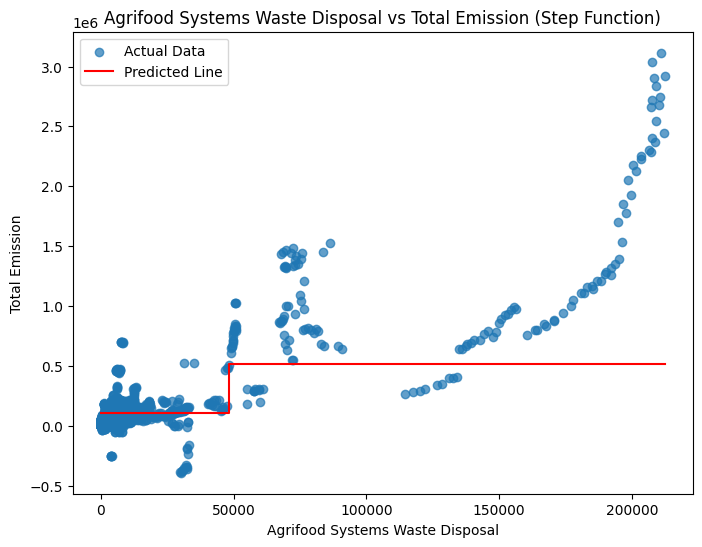

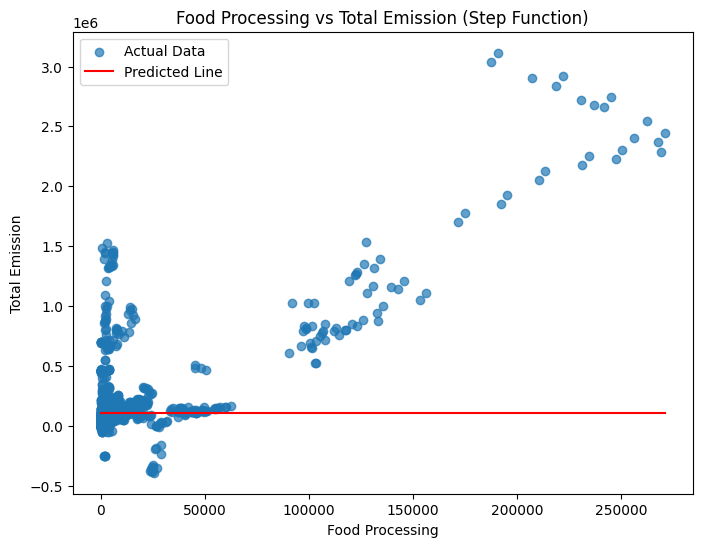

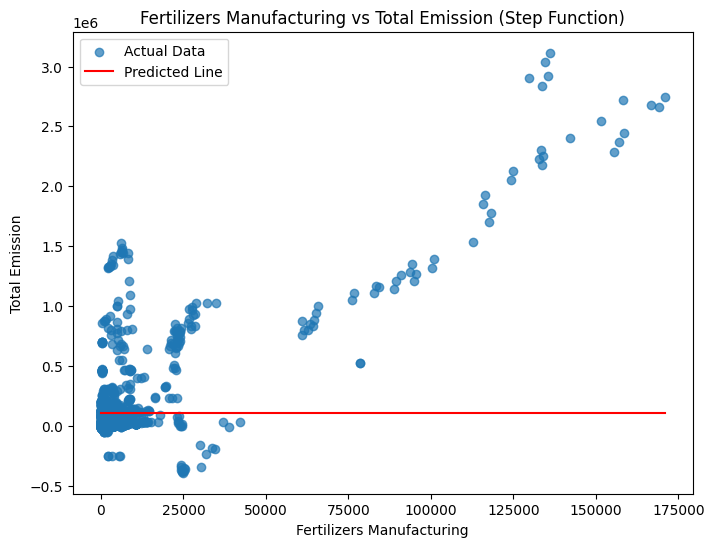

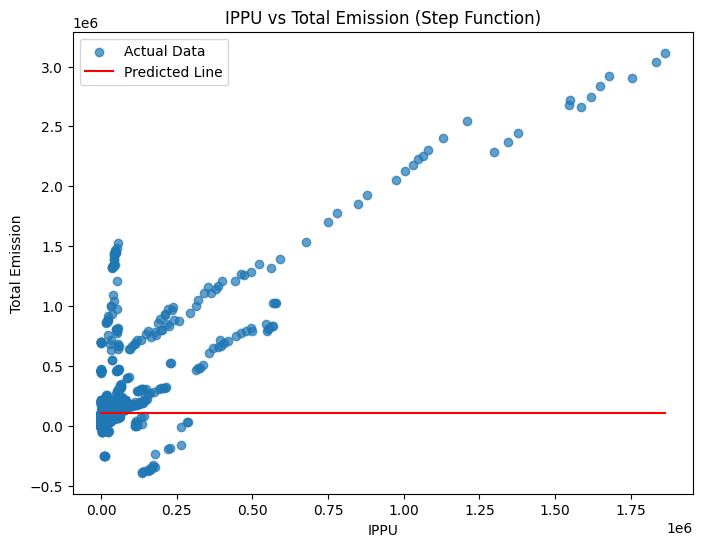

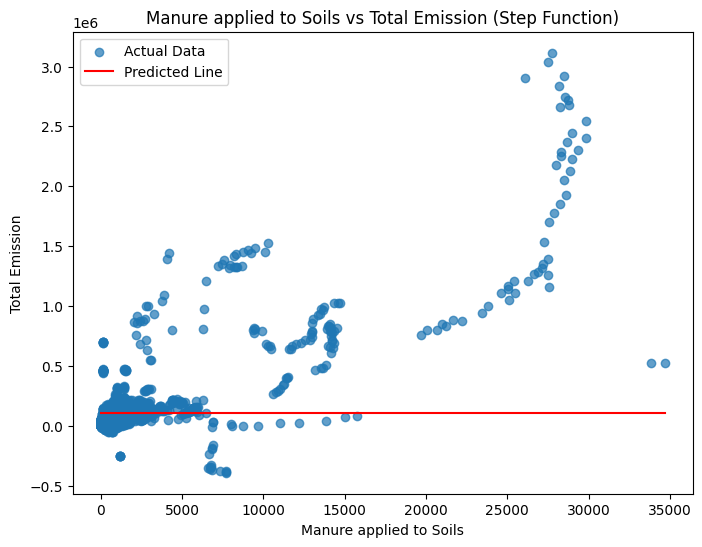

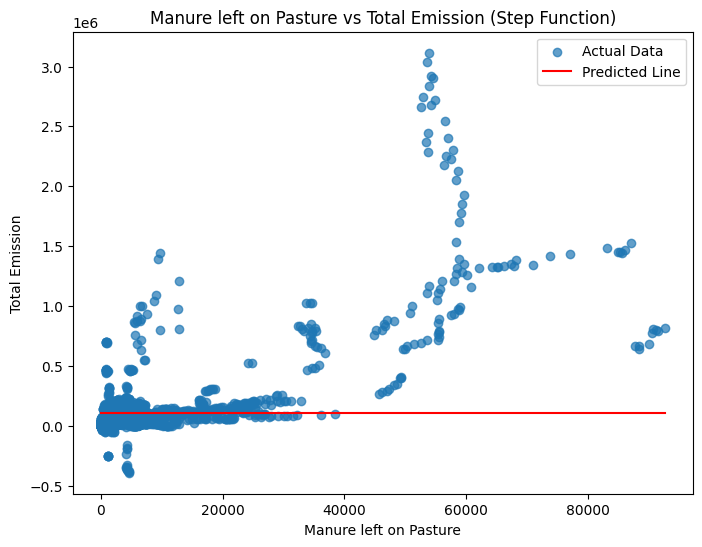

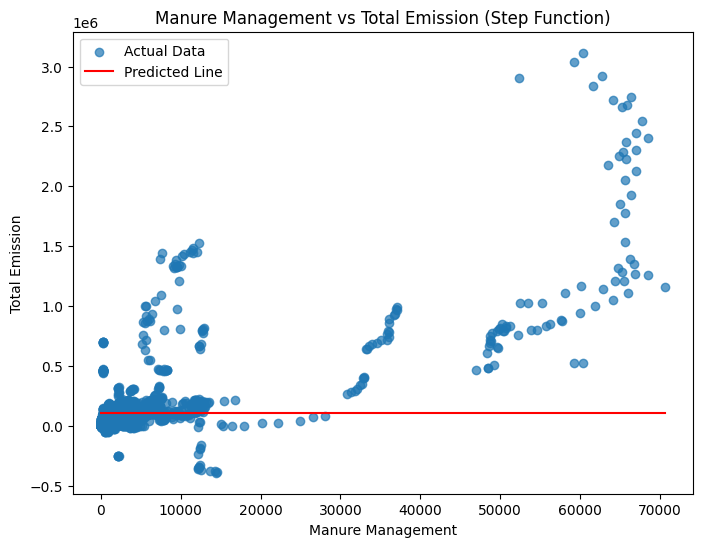

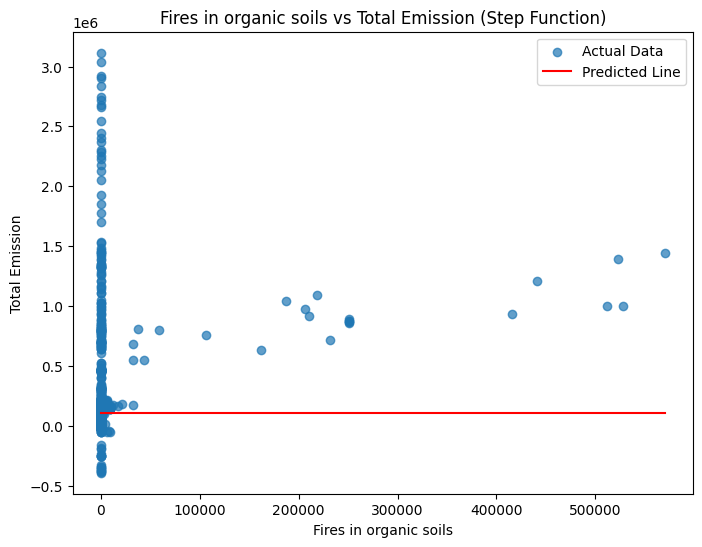

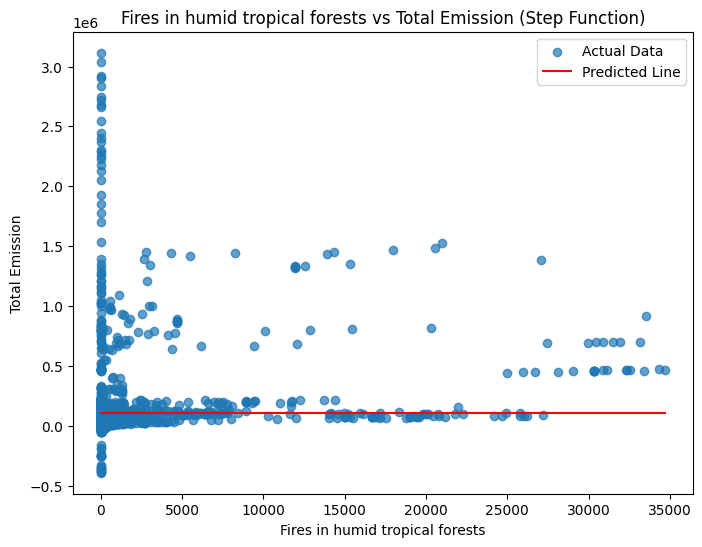

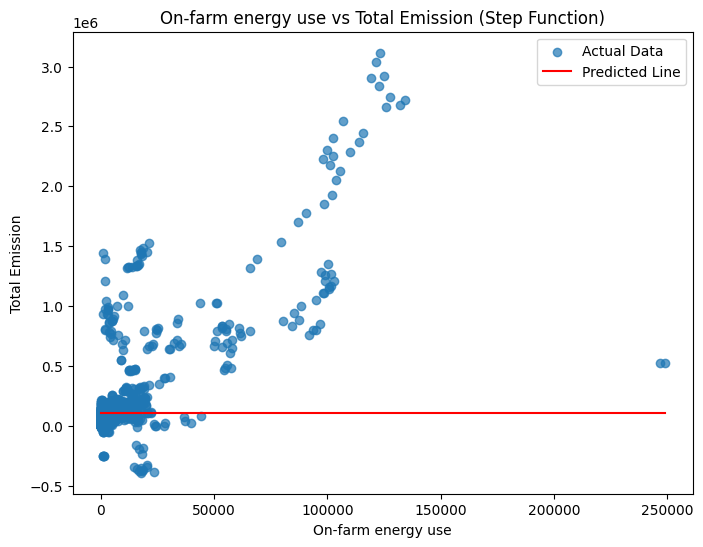

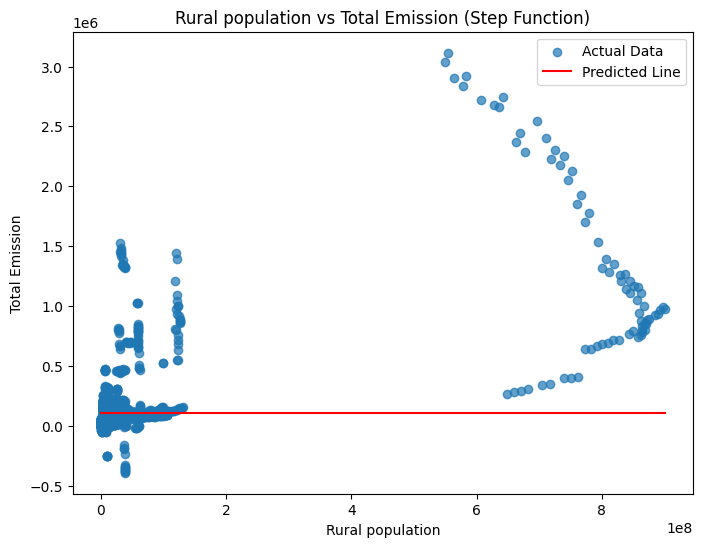

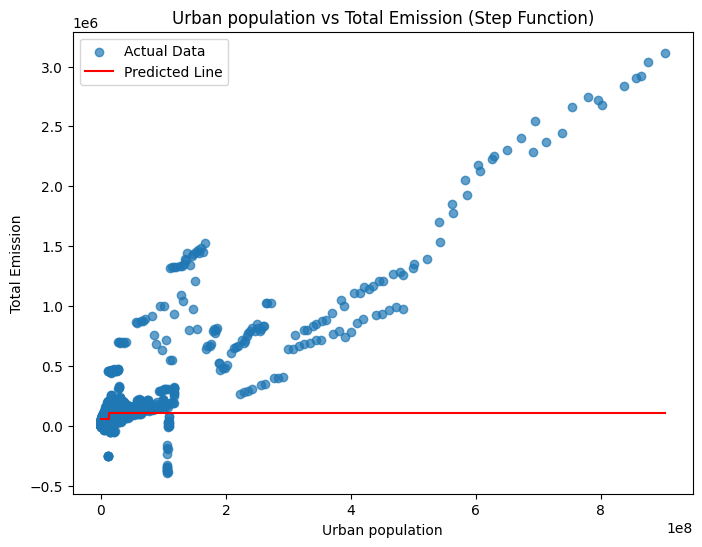

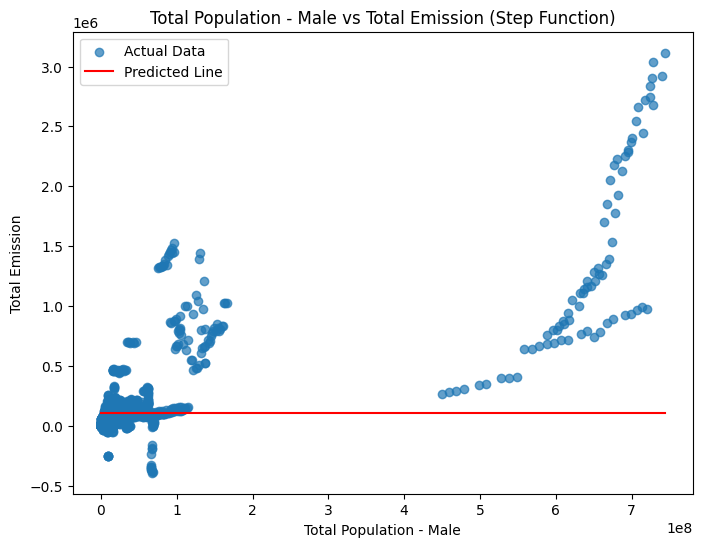

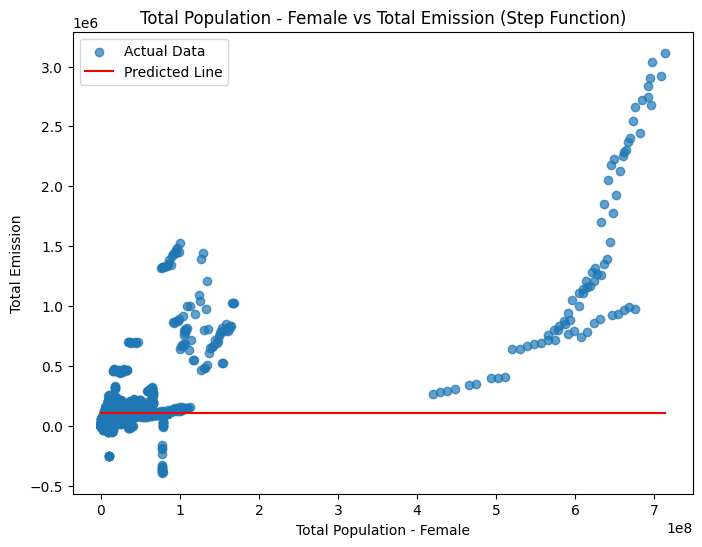

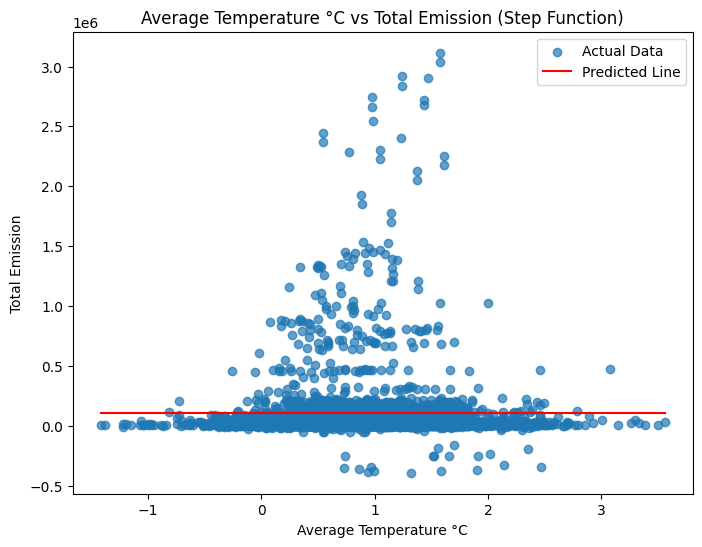

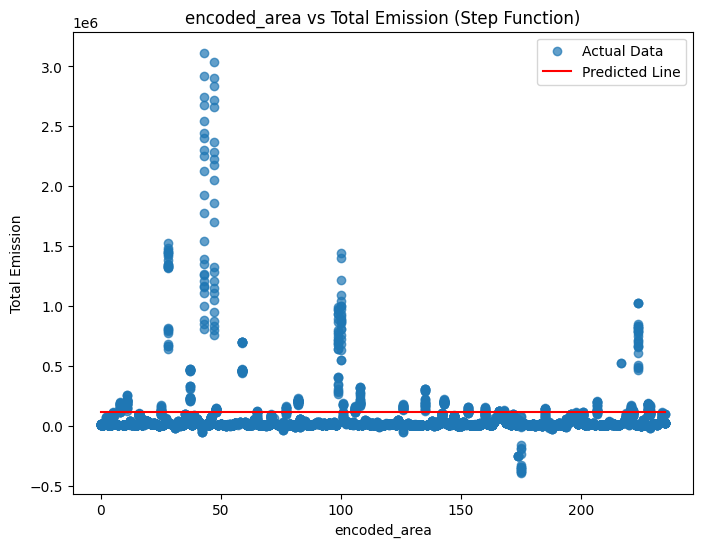

In [ ]:
# Importing important libraries for graphics

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Transforms catergorical column into numerical representations, because model uses numerical only
df['encoded_area'] = encoder.fit_transform(df['Area'])

# Define features (X) and target (y)
X = df.drop(columns=['total_emission', 'Area']) # Exclude original 'Area' because it is catergorical
y = df['total_emission']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
model = DecisionTreeRegressor(max_depth=4, random_state=42)  
model.fit(X_train, y_train)


def plot_step_function(feature):
    """Plots a step function for a single feature."""
    
    # Generate a range of values for the feature
    x_domain = np.linspace(X_train[feature].min(), X_train[feature].max(), 100)
    
    # Create a DataFrame for prediction
    X_temp = pd.DataFrame(np.repeat(X_train.mean().values.reshape(1, -1), 100, axis=0), columns=X_train.columns)
    X_temp[feature] = x_domain
    
    # Predict using the model
    y_pred = model.predict(X_temp)
    
    # Plot the step function and data points
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train[feature], y_train, label="Actual Data", alpha=0.7)
    plt.step(x_domain, y_pred, where='mid', color="red", label="Predicted Line") 
    plt.xlabel(feature)
    plt.ylabel("Total Emission")
    plt.title(f"{feature} vs Total Emission (Step Function)")
    plt.legend()
    plt.show()

# Plot for each feature
for feature in X_train.columns:
    plot_step_function(feature)